### **Ford Car Price Prediction**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

In [ ]:
# Loading DataFrame
DataFrame = pd.read_csv("ford.csv")
firstDataFrame = pd.DataFrame(DataFrame)

In [ ]:
firstDataFrame.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
# Data Analysis Part
firstDataFrame.isnull().sum()

print(firstDataFrame.describe())

               year         price        mileage           tax           mpg  \
count  17966.000000  17966.000000   17966.000000  17966.000000  17966.000000   
mean    2016.866470  12279.534844   23362.608761    113.329456     57.906980   
std        2.050336   4741.343657   19472.054349     62.012456     10.125696   
min     1996.000000    495.000000       1.000000      0.000000     20.800000   
25%     2016.000000   8999.000000    9987.000000     30.000000     52.300000   
50%     2017.000000  11291.000000   18242.500000    145.000000     58.900000   
75%     2018.000000  15299.000000   31060.000000    145.000000     65.700000   
max     2060.000000  54995.000000  177644.000000    580.000000    201.800000   

         engineSize  
count  17966.000000  
mean       1.350807  
std        0.432367  
min        0.000000  
25%        1.000000  
50%        1.200000  
75%        1.500000  
max        5.000000  


[]

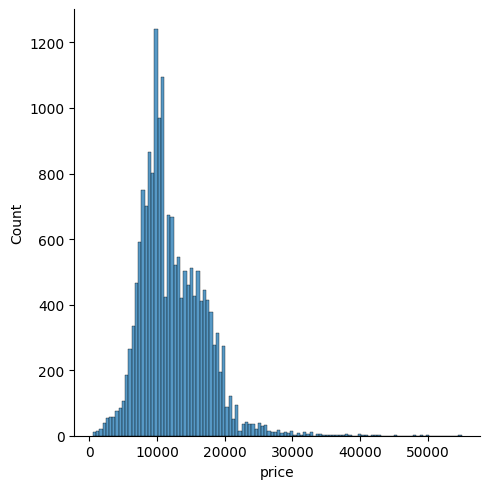

In [ ]:
sbn.displot(firstDataFrame["price"])
plt.plot()

In [ ]:
model_counts = firstDataFrame['model'].value_counts()
print(model_counts)

model
 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: count, dtype: int64


In [ ]:
# Model adedi 100'den az olan verileri seçelim
models_with_less_than_100_count = model_counts[model_counts < 100]

# Seçilen verilerin toplam adedini hesaplayalım
total_count = models_with_less_than_100_count.sum()
print("---------------------------------------------------------------------------------")
print("Model adedi 100'den az olan verilerin toplam adedi:", total_count)
print(models_with_less_than_100_count)
print("---------------------------------------------------------------------------------")

---------------------------------------------------------------------------------
Model adedi 100'den az olan verilerin toplam adedi: 320
model
 Puma                     80
 Tourneo Custom           69
 Grand Tourneo Connect    59
 Mustang                  57
 Tourneo Connect          33
 Fusion                   16
 Streetka                  2
 Ranger                    1
 Escort                    1
 Transit Tourneo           1
Focus                      1
Name: count, dtype: int64
---------------------------------------------------------------------------------


In [ ]:
print("\n\n1000 tl den az arac sayısı:  ",len(firstDataFrame[firstDataFrame['price'] < 1000]))
print("\n 25 bin  tl den fazla arac sayısı:  ",len(firstDataFrame[firstDataFrame['price'] > 25000]))



1000 tl den az arac sayısı:   11

 25 bin  tl den fazla arac sayısı:   245


[]

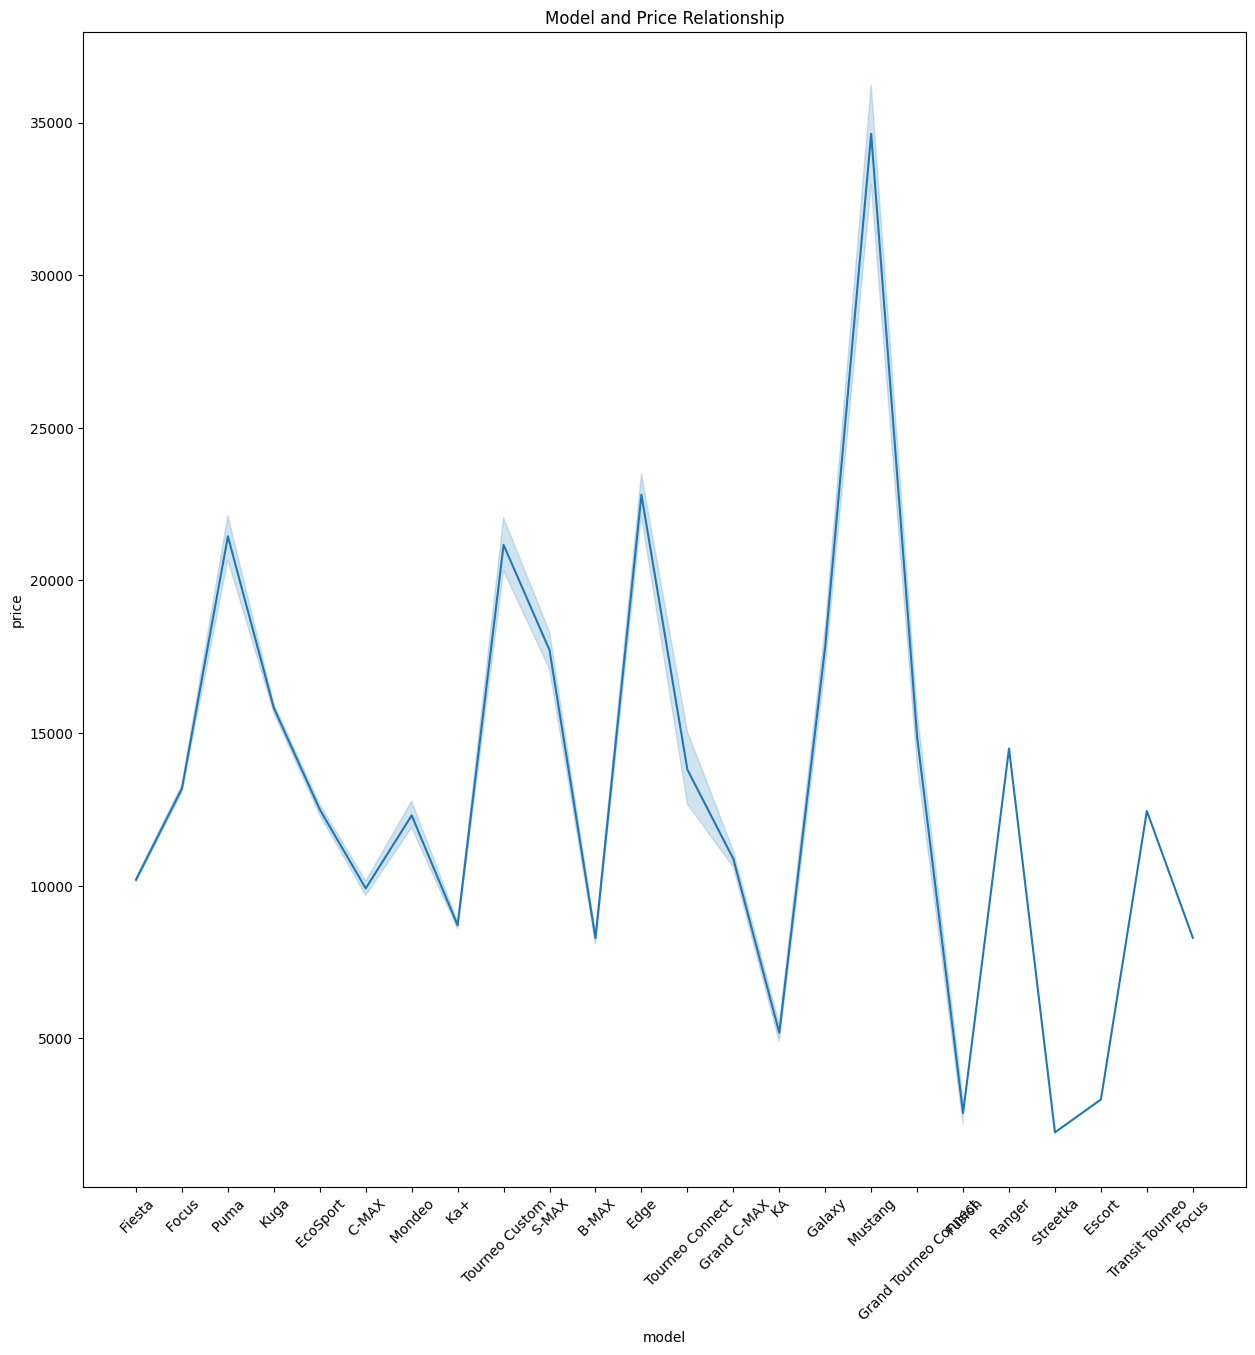

In [ ]:

plt.figure(figsize=(15, 15))
sbn.lineplot(data=firstDataFrame, x='model', y='price')
plt.xticks(rotation=45)
plt.title('Model and Price Relationship')
plt.plot()


[]

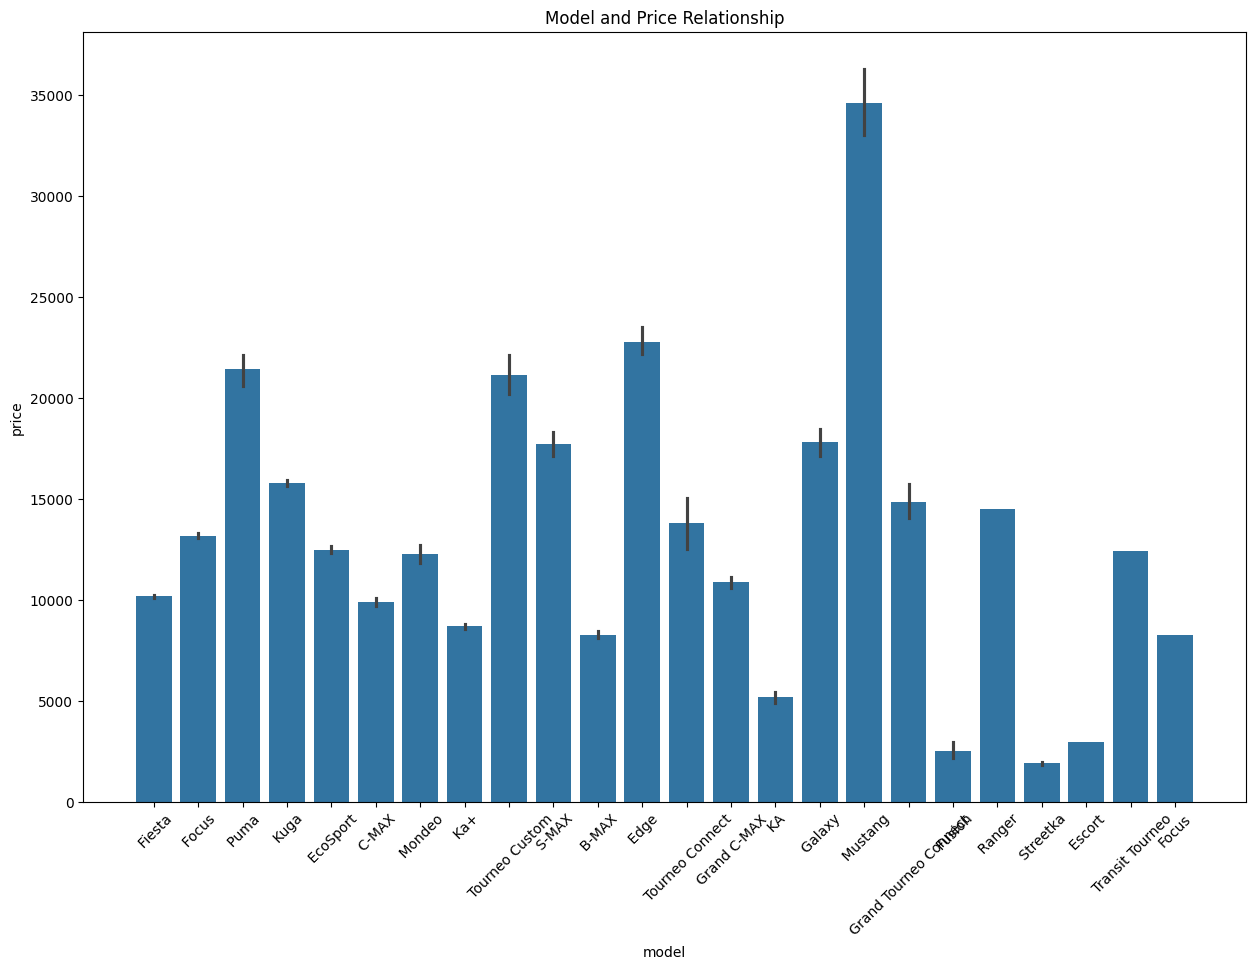

In [ ]:
plt.figure(figsize=(15, 10))
sbn.barplot(data=firstDataFrame, x='model', y='price')
plt.xticks(rotation=45)
plt.title('Model and Price Relationship')
plt.plot()


[]

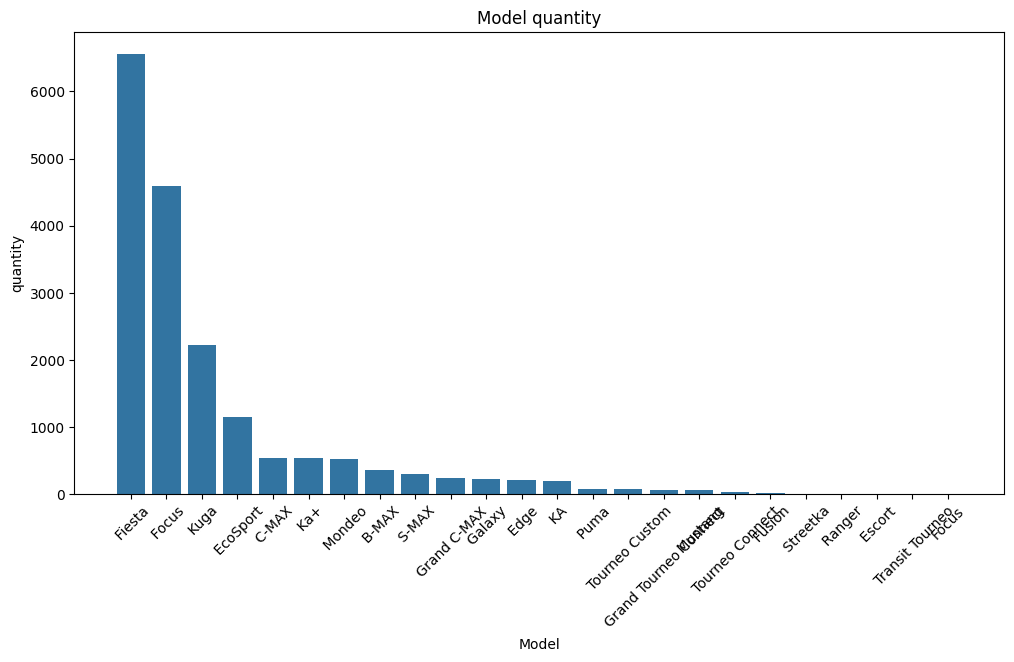

In [ ]:
plt.figure(figsize=(12, 6))
sbn.barplot(x=model_counts.index, y=model_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('quantity')
plt.title('Model quantity')
plt.plot()

In [ ]:
#Delete models with less than 100 vehicles
new_models = model_counts[model_counts > 100].index
cleanDataframe = firstDataFrame[firstDataFrame['model'].isin(new_models)]

#delete erroneous data
cleanDataframe = cleanDataframe[cleanDataframe["year"] < 2024]
cleanDataframe = cleanDataframe[cleanDataframe["year"] > 2000]
cleanDataframe = cleanDataframe[cleanDataframe['price'] <= 25000]
cleanDataframe = cleanDataframe[cleanDataframe['price'] > 1000]



In [ ]:
print(cleanDataframe.describe())
print("\n\n1000 tl den az arac sayısı:  ",len(cleanDataframe[cleanDataframe['price'] < 1000]))
print("\n 25 bin  tl den fazla arac sayısı:  ",len(cleanDataframe[cleanDataframe['price'] > 25000]))
print("2000 yılından eski araçlar = ",len(cleanDataframe[cleanDataframe['year'] < 2000]))


               year         price        mileage           tax           mpg  \
count  17456.000000  17456.000000   17456.000000  17456.000000  17456.000000   
mean    2016.844294  11971.464024   23574.583639    112.152269     58.261738   
std        1.959937   4161.681028   19287.119180     61.506202      9.491358   
min     2003.000000   1095.000000       1.000000      0.000000     26.300000   
25%     2016.000000   8998.000000   10254.500000     30.000000     53.300000   
50%     2017.000000  11000.000000   18523.500000    145.000000     58.900000   
75%     2018.000000  14998.000000   31299.750000    145.000000     65.700000   
max     2020.000000  25000.000000  174000.000000    555.000000     88.300000   

         engineSize  
count  17456.000000  
mean       1.331462  
std        0.386428  
min        0.000000  
25%        1.000000  
50%        1.200000  
75%        1.500000  
max        5.000000  


1000 tl den az arac sayısı:   0

 25 bin  tl den fazla arac sayısı:   0
2000 yı

[]

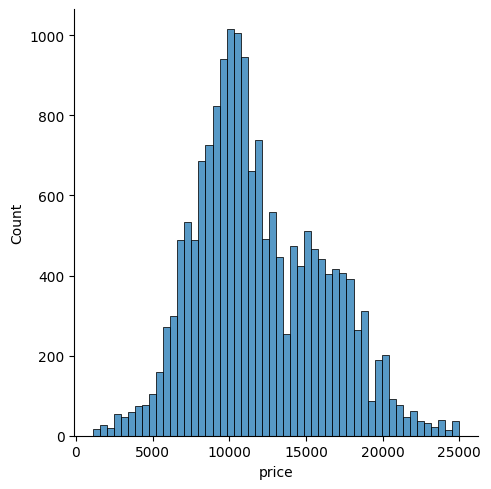

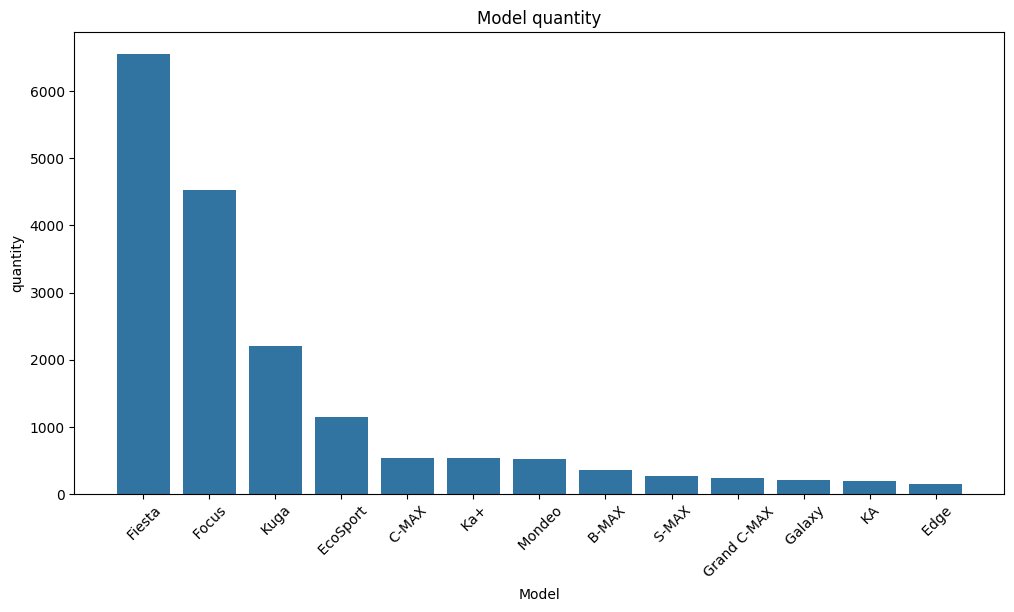

In [ ]:
sbn.displot(cleanDataframe["price"])
plt.plot()


model_counts2 = cleanDataframe['model'].value_counts()

plt.figure(figsize=(12, 6))
sbn.barplot(x=model_counts2.index, y=model_counts2.values)
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('quantity')
plt.title('Model quantity')
plt.plot()

In [ ]:
##cleanDataframe = cleanDataframe.drop("tax",axis=1)



data_encoded = pd.get_dummies(cleanDataframe, columns=['transmission'])
data_encoded = pd.get_dummies(data_encoded, columns=['model'])
data_encoded = pd.get_dummies(data_encoded, columns=['fuelType'])

In [ ]:
y = data_encoded["price"].values #dependent variable
x = data_encoded.drop("price",axis = 1).values #independent variable

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 10 )

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [ ]:
print(x_train.shape)

(11695, 26)


Epoch 1/300
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 159562240.0000 - val_loss: 144560496.0000
Epoch 2/300
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 110432144.0000 - val_loss: 16378456.0000
Epoch 3/300
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15205268.0000 - val_loss: 13007969.0000
Epoch 4/300
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13051415.0000 - val_loss: 11039915.0000
Epoch 5/300
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11325436.0000 - val_loss: 9798128.0000
Epoch 6/300
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10257026.0000 - val_loss: 8795411.0000
Epoch 7/300
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8978616.0000 - val_loss: 7976396.5000
Epoch 8/300
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8202353.0000 - val_loss: 7320216.0000
Epoch 9/300
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7662480.5000 - val_loss: 6741598.0000
Epoch 10/300
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6809624.0000 - val_loss: 6226704.0

<Axes: >

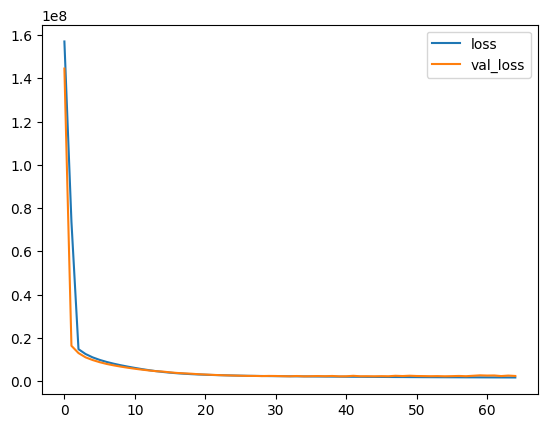

In [ ]:
model = Sequential()


model.add(Dense(128,activation="relu"))

model.add(Dense(64,activation="relu"))

model.add(Dense(32,activation="relu"))


model.add(Dense(1))

model.compile(optimizer = "adam",loss = "mse")

earlyStopping = EarlyStopping(monitor = "val_loss", mode = "min",verbose = 1, patience = 25)

model.fit(x = x_train, y = y_train,validation_data = (x_test, y_test),batch_size = 100, epochs = 300, callbacks = [earlyStopping])

lossDataFrame = pd.DataFrame(model.history.history)

lossDataFrame.plot()


In [ ]:
predArray = model.predict(x_test)

print(mean_absolute_error(y_test,predArray))

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
1169.063720703125


In [ ]:
print(firstDataFrame.iloc[486])

model            Focus
year              2017
price            10900
transmission    Manual
mileage          13338
fuelType        Diesel
tax                  0
mpg               74.3
engineSize         1.5
Name: 486, dtype: object


In [ ]:
newCar = data_encoded.drop("price",axis=1).iloc[486]

newCar = scaler.transform(newCar.values.reshape(-1,26))

print(model.predict(newCar))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[8318.169]]


In [ ]:
# Assuming 'new_x' is a NumPy array or DataFrame of new data points
predictions = model.predict(newCar)
print(predictions)
test_predictions = model.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)
print("MSE:", mse)
print("R-squared:", r2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[8318.169]]
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step
MSE: 2419053.75
R-squared: 0.8594503402709961
